In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

2023-08-07 13:49:19.057003: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-07 13:49:19.059665: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-07 13:49:19.118068: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-07 13:49:19.119820: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 13:49:20.096475: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
#CREATING A LIST OF SENTENCES WITH EACH ELEMENT BEING A LINE OF THE TEXT FILE
data = []
with open('motivation_quotes.txt') as moti_file:
    for line in moti_file.readlines():
        data.append(line.rstrip())

corpus = [item.lower().translate(str.maketrans('','',string.punctuation)) for item in data]

print(corpus)

['its easy to have faith everything is going to work out when everything is working out', 'its much harder to have faith when you are facing challenges in your life but that is exactly when you need to apply your faith', 'because faith is believing in the unseen', 'faith is taking the first step', 'faith is jumping in the deep end and knowing everything will be ok', 'it is easy to be positive when everything is working out it is much harder much much harder when nothing is working out', 'but that is when we need it the most', 'everything worth the prize', 'it is worth the fight', 'everything worth the prize will require a real fight to achieve that prize', 'if you want the prize you cant quit at half time you cant quit mid season you must play the whole game pre season through the cold through darkness through the challenges the opponents', 'you will be knocked down but you must get up keep fighting dig deep and discover your true strength', 'then you will win the real prize', 'charact

In [4]:
#TOKENIZING THE CORPUS OF WORDS CREATED FROM THE TEXT FILE

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

print(tokenizer.word_index)

vocab_len = len(tokenizer.word_index) + 1

{'the': 1, 'you': 2, 'to': 3, 'is': 4, 'and': 5, 'of': 6, 'a': 7, 'it': 8, 'i': 9, 'in': 10, 'be': 11, 'that': 12, 'not': 13, 'will': 14, 'are': 15, 'if': 16, 'have': 17, 'your': 18, 'success': 19, 'can': 20, 'who': 21, 'life': 22, 'but': 23, 'do': 24, 'one': 25, 'learning': 26, 'for': 27, 'what': 28, 'people': 29, 'no': 30, 'when': 31, 'love': 32, 'with': 33, 'we': 34, 'by': 35, 'work': 36, 'more': 37, 'learn': 38, 'than': 39, 'dont': 40, 'from': 41, 'day': 42, 'all': 43, 'make': 44, 'there': 45, 'they': 46, 'hard': 47, 'on': 48, 'at': 49, 'want': 50, 'or': 51, 'my': 52, 'never': 53, 'out': 54, 'know': 55, 'without': 56, 'keep': 57, 'as': 58, 'time': 59, 'up': 60, 'yourself': 61, 'failure': 62, 'everything': 63, 'most': 64, 'those': 65, 'cant': 66, 'way': 67, 'give': 68, 'how': 69, 'things': 70, 'man': 71, 'successful': 72, 'only': 73, 'doing': 74, 'go': 75, 'just': 76, 'much': 77, 'so': 78, 'live': 79, 'where': 80, 'don’t': 81, 'always': 82, 'try': 83, 'something': 84, 'stop': 85, 'o

In [5]:
#FOR EACH SENTENCE WE ARE GOING TO CONVERT THEM INTO A SEQUENCE OF NUMBERS AND THEN CREATE SPLIT SEQUENCES WHICH WE FEED TO THE MODEL AS INPUT 
input_sequences = []
for item in corpus:
    sequence = tokenizer.texts_to_sequences([item])[0]
    for i in range(1, len(sequence)):
        split_sequence = sequence[:i+1]
        input_sequences.append(split_sequence)

max_len = max([len(x) for x in input_sequences])

print(input_sequences[:5])    

[[126, 210], [126, 210, 3], [126, 210, 3, 17], [126, 210, 3, 17, 142], [126, 210, 3, 17, 142, 63]]


In [6]:
#WE TAKE EACH SPLIT SEQUENCE AND MOVE THE LAST INDEX INTO A NEW LIST WHICH WILL BE THE "LABELS". WE FEED THESE ARRAYS TO THE MODEL TO LEARN THE NEXT WORD (INDEX) GIVEN A SEQUENCE OF WORDS (INDICES)
X = []
y = []
for sequence in input_sequences:   
    X.append(sequence[:-1])
    y.append(sequence[-1])

X_padded = pad_sequences(X, maxlen=max_len, padding='pre')

#PRINTING EXAMPLES OF THE PADDED INPUTS AND THEIR CORRESPONDING LABELS
print(X_padded[:6]) 
print(y[:6])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0 126]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0 126 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0 126 210   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [7]:
#STOPPING TRAINING EARLY IF THE ACCURACY GETS TO 0.80

class Callback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.80 and logs is not None:
            print("\nStopping training early")
            self.model.stop_training = True

In [8]:
callback = Callback()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_len, 16))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_len - 1, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_len - 1)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(vocab_len, activation='softmax'))

print(model.summary())

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(np.array(X_padded), np.array(y), epochs=700, verbose=1, callbacks=[callback])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          24224     
                                                                 
 bidirectional (Bidirection  (None, None, 124)         39184     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 124)               92752     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 32)                4000      
                                                                 
 dense_1 (Dense)             (None, 1514)              49962     
                                                                 
Total params: 210122 (820.79 KB)
Trainable params: 21012

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Acccuracy')]

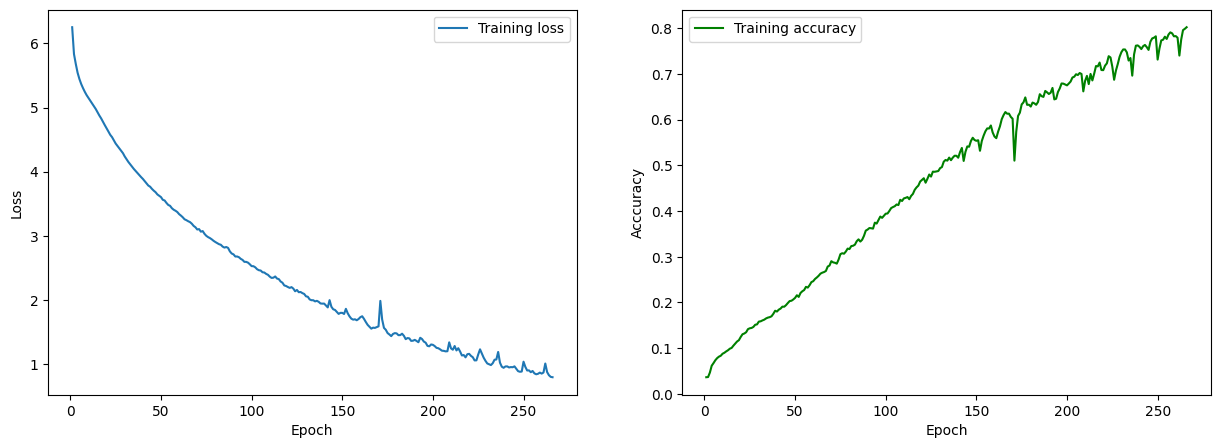

In [9]:
#PLOTTING THE LOSS AND ACCURACY AS TRAINING PROGRESSES
history_dict = history.history
loss = history_dict['loss']
accuracy = history_dict['accuracy']
epochs = np.array(range(len(loss))) + 1
fig, ax1 = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label="Training loss")
ax1.set(xlabel="Epoch",ylabel="Loss")
ax1.legend()
        
ax2.plot(epochs, accuracy, label="Training accuracy",color='green')
ax2.legend()
ax2.set(xlabel="Epoch",ylabel="Acccuracy")

In [11]:
#PREDICTING THE NEXT 200 WORDS OF THE SEED TEXT TO CREATE A MINI MOTIVATIONAL SPEECH

index_to_word = {index:word for word,index in tokenizer.word_index.items()}

num_of_words = 200

seed_text = "what are you doing"

for _ in range(num_of_words):
    token_seed = tokenizer.texts_to_sequences([seed_text])[0]
    padded_seed = pad_sequences([token_seed], maxlen=max_len, padding='pre')
    word = index_to_word.get(np.argmax(model.predict(padded_seed,verbose=0)))
    seed_text += ' '+word

print(seed_text)

what are you doing to live with — you marry someone you cannot live without and know we cannot live within yourself that is precisely then you should fail much have bitter patience and which thats live by third by people are halfway there gather journey control in i do that is at what you should fail i read behind for more cause and maintained by doing today you are doomed to succeed how of hard work is to make it in what others is no great reflection you can change your attitude and in that you will teach right an atmosphere of a kind of thing that will be long life is to change from the end it will lead are made of sweat inspire errors and hanging with themselves process things i want to evolve if i look another deep for out and my day dont prepare but my attitude it is where you feel you can make some mistakes it refused to offer a firm times my chance to succeed your life will keep attributes the real prize than could be proud in the relationship than success get in the dog you mus